In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# def warn(*args, **kwargs): pass
# import warnings
# warnings.warn = warn

### Load Data

In [23]:
# temp.to_csv('score_QK_v2.csv',index=False)
score_QK = pd.read_csv('../score_QK.csv')
score_QK_extra = pd.read_csv('../score_QK_extra.csv')

In [24]:
score_QK.head()

company        date    return  bad  \
0       A  2000-03-15  0.680463  1.0   
1       A  2000-06-12  0.937685  0.0   
2       A  2001-01-17  0.557929  1.0   
3       A  2001-03-19  0.947393  0.0   
4       A  2001-06-14  0.821604  0.0   

                                                 url QK  \
0  /Archives/edgar/data/1090872/00009120570001170...  Q   
1  /Archives/edgar/data/1090872/00009120570002820...  Q   
2  /Archives/edgar/data/1090872/00010958110100022...  K   
3  /Archives/edgar/data/1090872/00010958110100163...  Q   
4  /Archives/edgar/data/1090872/00008916180150118...  Q   

                                score adjust_datetime  
0  [508, 176, 250, 304, 63, 143, 116]      2000-03-15  
1   [494, 133, 223, 278, 42, 133, 97]      2000-06-12  
2  [569, 172, 231, 284, 47, 126, 127]      2001-01-17  
3  [449, 121, 200, 232, 40, 123, 111]      2001-03-19  
4  [519, 123, 209, 225, 47, 130, 107]      2001-06-14

In [25]:
score_QK_extra.head()

company        date adjust_datetime    return  bad  \
0       A  2000-03-15      2000-03-15  0.680463  1.0   
1       A  2000-06-12      2000-06-12  0.937685  0.0   
2       A  2000-09-01      2000-09-01  0.893940  0.0   
3       A  2001-01-17      2001-01-17  0.557929  1.0   
4       A  2001-03-19      2001-03-19  0.947393  0.0   

                                                 url QK  \
0  /Archives/edgar/data/1090872/00009120570001170...  Q   
1  /Archives/edgar/data/1090872/00009120570002820...  Q   
2  /Archives/edgar/data/1090872/00009120570004000...  Q   
3  /Archives/edgar/data/1090872/00010958110100022...  K   
4  /Archives/edgar/data/1090872/00010958110100163...  Q   

                                score  
0  [532, 176, 255, 305, 63, 143, 139]  
1  [518, 134, 227, 279, 42, 133, 120]  
2  [513, 117, 212, 274, 33, 121, 137]  
3  [594, 172, 234, 285, 47, 126, 147]  
4  [472, 121, 205, 234, 40, 123, 133]

In [26]:
sec_op = pd.read_csv('cutted_data_opaque_sp.csv')

In [27]:
sec_op.head()

company        date adjust_starttime adjust_endtime    return  bad  \
0       A  2000-03-15       2000-03-15     2000-06-12  0.680463  1.0   
1       A  2000-06-12       2000-06-12     2000-09-01  0.937685  0.0   
2       A  2000-09-01       2000-09-01     2001-01-17  0.893940  0.0   
3       A  2001-01-17       2001-01-17     2001-03-19  0.557929  1.0   
4       A  2001-03-19       2001-03-19     2001-06-14  0.947393  0.0   

                                                 url QK  opaque  sec  \
0  /Archives/edgar/data/1090872/00009120570001170...  Q     0.0   35   
1  /Archives/edgar/data/1090872/00009120570002820...  Q     0.0   35   
2  /Archives/edgar/data/1090872/00009120570004000...  Q     0.0   35   
3  /Archives/edgar/data/1090872/00010958110100022...  K     0.0   35   
4  /Archives/edgar/data/1090872/00010958110100163...  Q     0.0   35   

   SP_return  
0   0.978001  
1   1.013764  
2   0.878735  
3   0.865028  
4   1.107807

In [28]:
np.unique(sec_op['sec'].values)

array([ 0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])

##### Merge data and opaque

In [32]:
score_QK_op = pd.merge(score_QK,sec_op,how='left')
score_QK_extra_op = pd.merge(score_QK_extra,sec_op,how='left')

##### filter na and opaque=0

In [35]:
score_QK_extra_op[score_QK_extra_op['opaque']==0]

company        date adjust_datetime    return  bad  \
0            A  2000-03-15      2000-03-15  0.680463  1.0   
1            A  2000-06-12      2000-06-12  0.937685  0.0   
2            A  2000-09-01      2000-09-01  0.893940  0.0   
3            A  2001-01-17      2001-01-17  0.557929  1.0   
4            A  2001-03-19      2001-03-19  0.947393  0.0   
5            A  2001-06-14      2001-06-14  0.821604  0.0   
6            A  2001-09-14      2001-09-14  1.462535  0.0   
75           A  2018-12-20      2018-12-20  1.031854  0.0   
76          AA  2016-12-01      2016-12-01  1.281695  0.0   
77          AA  2017-03-15      2017-03-15  0.953943  0.0   
78          AA  2017-05-10      2017-05-10  1.130597  0.0   
79          AA  2017-08-03      2017-08-03  1.241069  0.0   
80          AA  2017-10-27      2017-10-27  0.997894  0.0   
81          AA  2018-02-26      2018-02-26  1.227678  0.0   
82          AA  2018-05-09      2018-05-09  0.847249  0.0   
83          AA  2018-08-02      2018-08-02  0.783753  0.0   
84          AA  2018-11-02      2018-11-02  0.730623  0.0   
85         AAC  2014-11-12      2014-11-12  1.112777  0.0   
86         AAC  2015-03-11      2015-03-11  1.074813  0.0   
87         AAC  2015-05-05      2015-05-05  1.192133  0.0   
88         AAC  2015-08-03      2015-08-03  1.226221  0.0   
89         AAC  2015-11-10      2015-11-10  0.883526  0.0   
98         AAC  2018-02-23      2018-02-23  1.249691  0.0   
99         AAC  2018-05-09      2018-05-09  0.902629  0.0   
100        AAC  2018-08-03      2018-08-03  0.589634  1.0   
101       AACC  2004-03-25      2004-03-25  1.010754  0.0   
102       AACC  2004-05-07      2004-05-07  0.869565  0.0   
103       AACC  2004-07-29      2004-07-29  1.152437  0.0   
104       AACC  2004-10-29      2004-10-29  1.106468  0.0   
105       AACC  2005-03-24      2005-03-24  1.124280  0.0   
...        ...         ...             ...       ...  ...   
251250    SMRT  2009-04-16      2009-04-16  0.967742  0.0   
251251    SMRT  2009-05-02      2009-05-02  2.429423  0.0   
251252    SMRT  2009-08-01      2009-08-01  0.842016  1.0   
251253    SMRT  2010-04-15      2010-04-15  1.010870  0.0   
251254    SMRT  2010-05-01      2010-05-01  0.916377  0.0   
251255    SMRT  2010-07-31      2010-07-31  1.276388  0.0   
251256    SMRT  2011-04-01      2011-04-01  1.026445  0.0   
251257    SMRT  2011-04-30      2011-04-30  1.023935  0.0   
251258    SMRT  2011-07-30      2011-07-30  0.834614  1.0   
251259    SMRT  2012-04-12      2012-04-12  0.986971  0.0   
251260    SMRT  2012-04-28      2012-04-28  1.311879  0.0   
251261    SMRT  2012-07-28      2012-07-28  0.992424  0.0   
251262    SMRT  2013-05-03      2013-05-03  1.226310  0.0   
251263    SMRT  2013-05-04      2013-05-04  1.285801  0.0   
251264    SMRT  2013-08-03      2013-08-03  1.169851  0.0   
251265    SMRT  2014-04-15      2014-04-15  0.987577  0.0   
251266    SMRT  2014-05-03      2014-05-03  1.042841  0.0   
251267    SMRT  2014-08-02      2014-08-02  0.952416  0.0   
251268    SMRT  2015-04-02      2015-04-02  1.004899  0.0   
251269    SMRT  2015-05-02      2015-05-02  0.843497  0.0   
251270    SMRT  2015-08-01      2015-08-01  0.868653  0.0   
251271    SMRT  2016-04-11      2016-04-11  1.045391  0.0   
251272    SMRT  2016-04-30      2016-04-30  1.249064  0.0   
251273    SMRT  2016-07-30      2016-07-30  0.738731  1.0   
251274    SMRT  2017-04-13      2017-04-13  1.008032  0.0   
251275    SMRT  2017-04-29      2017-04-29  0.560538  1.0   
251276    SMRT  2017-07-29      2017-07-29  0.888888  0.0   
251277    SMRT  2018-05-04      2018-05-04  1.105881  0.0   
251278    SMRT  2018-05-05      2018-05-05  0.756096  1.0   
251279    SMRT  2018-08-04      2018-08-04  0.637737  1.0   

                                                      url QK  \
0       /Archives/edgar/data/1090872/00009120570001170...  Q   
1       /Archives/edgar/data/1090872/00009120570002820...  Q   
2       /Archives/edgar/data/109

##### make score to each sentiment

In [37]:
def split_score(df,outputfile):
    emotion=['Negative','Positive','Uncertainty','Litigious','StrongModal','WeakModal','Constraining']
    emotion=pd.DataFrame(columns=emotion)
    for i in range(df.shape[0]):
        try:
            emotion.loc[i]=df["score"].values[i][1:-1].split(",")
        except:
            emotion.loc[i]=0
    emotion=emotion.astype(float)
    emotion.index=df.index
    score_combine_emotion=pd.concat([df,emotion],axis=1)
    score_combine_emotion.to_csv(outputfile)
    
    return score_combine_emotion

In [ ]:
score_combine_emotion_extra = split_score(score_QK_op_extra,"score_combine_emotion_QK_extra.csv")
score_combine_emotion = split_score(score_QK_op,"score_combine_emotion_QK_op.csv")

In [ ]:
score_combine_emotion_extra = split_score(score_QK_op_extra,"score_combine_emotion_QK_extra.csv")

In [142]:
score_combine_emotion = pd.read_csv("score_combine_emotion_QK_op.csv")
# score_combine_emotion_extra = pd.read_csv("score_combine_emotion_extra.csv")

In [145]:
score_combine_emotion.shape

(150291, 21)

In [144]:
score_combine_emotion = score_combine_emotion.dropna()

In [141]:
score_combine_emotion.to_csv("score_combine_emotion_QK_op.csv",index=False)

In [15]:
score_combine_emotion.head()

company        date    return  bad  \
5       A  2002-01-22  1.034088  0.0   
6       A  2002-03-06  0.741458  0.0   
7       A  2002-06-05  0.560176  1.0   
8       A  2002-12-20  0.712024  1.0   
9       A  2003-03-12  1.192572  0.0   

                                                 url QK    opaque  sec  \
5  /Archives/edgar/data/1090872/00008916180200018...  K  2.303592   35   
6  /Archives/edgar/data/1090872/00008916180200104...  Q  2.303592   35   
7  /Archives/edgar/data/1090872/00008916180200270...  Q  2.303592   35   
8  /Archives/edgar/data/1090872/00008916180200562...  K  2.511690   35   
9  /Archives/edgar/data/1090872/00008916180300121...  Q  2.511690   35   

   SP_return                                score  Negative  Positive  \
5   1.008404   [663, 168, 262, 243, 54, 130, 156]     663.0     168.0   
6   0.925112   [547, 173, 257, 183, 41, 129, 132]     547.0     173.0   
7   0.876167   [569, 166, 267, 203, 31, 129, 147]     569.0     166.0   
8   0.947968  [1197, 353, 448, 302, 93, 154, 284]    1197.0     353.0   
9   1.090619   [874, 256, 381, 283, 69, 145, 230]     874.0     256.0   

   Uncertainty  Litigious  StrongModal  WeakModal  Constraining  
5        262.0      243.0         54.0      130.0         156.0  
6        257.0      183.0         41.0      129.0         132.0  
7        267.0      203.0         31.0      129.0         147.0  
8        448.0      302.0         93.0      154.0         284.0  
9        381.0      283.0         69.0      145.0         230.0

In [5]:
score_combine_emotion_extra.head()

Unnamed: 0 company        date    return  bad  \
0           0       A  2000-03-15  0.680463  1.0   
1           1       A  2000-06-12  0.937685  0.0   
2           2       A  2001-03-19  0.947393  0.0   
3           3       A  2001-06-14  0.821604  0.0   
4           4       A  2002-03-06  0.741458  0.0   

                                                 url  \
0  /Archives/edgar/data/1090872/00009120570001170...   
1  /Archives/edgar/data/1090872/00009120570002820...   
2  /Archives/edgar/data/1090872/00010958110100163...   
3  /Archives/edgar/data/1090872/00008916180150118...   
4  /Archives/edgar/data/1090872/00008916180200104...   

                                                text  \
0  item 2. management's discussion and analysis o...   
1  item 2. management's discussion and analysis o...   
2  item 2. management's discussion and analysis o...   
3  item 2. management's discussion and analysis o...   
4  item 2. managements discussion and analysis o...   

                                score  Negative  Positive  Uncertainty  \
0  [536, 176, 257, 305, 63, 143, 139]     536.0     176.0        257.0   
1  [521, 134, 229, 279, 42, 133, 120]     521.0     134.0        229.0   
2  [474, 121, 208, 234, 40, 123, 133]     474.0     121.0        208.0   
3  [544, 124, 212, 227, 47, 130, 127]     544.0     124.0        212.0   
4  [577, 173, 261, 184, 41, 129, 148]     577.0     173.0        261.0   

   Litigious  StrongModal  WeakModal  Constraining  
0      305.0         63.0      143.0         139.0  
1      279.0         42.0      133.0         120.0  
2      234.0         40.0      123.0         133.0  
3      227.0         47.0      130.0         127.0  
4      184.0         41.0      129.0         148.0

### Model and Train

In [42]:
from sklearn.metrics import accuracy_score, log_loss,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
import time

classifiers = [
#     KNeighborsClassifier(3,n_jobs=3),
# #     SVC(kernel="linear", C=0.025, probability=True),
# #     NuSVC(probability=True),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5),
#     AdaBoostClassifier(),
#     GradientBoostingClassifier(),
#     GaussianNB(),
#     LinearDiscriminantAnalysis(),
#     QuadraticDiscriminantAnalysis(),
#     XGBClassifier(),
    LGBMClassifier()]

In [69]:
# Just emotion
def data_preprocessing_v1(score_combine_emotion):
    X=score_combine_emotion[['Negative','Positive', 'Uncertainty', 'Litigious', 'StrongModal', 'WeakModal','Constraining']]
    y=score_combine_emotion["bad"]
    desire_index=pd.concat([X,y],axis=1)[(X.sum(axis=1)>100)].index
    X=X.loc[desire_index].values
    y=y.loc[desire_index].values
#     linearly_separable = (X, y)
#     multiple=int(len(y)/len(y[y==1]))
    X = StandardScaler().fit_transform(X)
    
    return X,y

# emotion + opaque
# filter 0 opaque
def data_preprocessing_v2(score_combine_emotion):
    X=score_combine_emotion[['Negative','Positive', 'Uncertainty', 'Litigious', 'StrongModal', 'WeakModal','Constraining','opaque']]
    X_=score_combine_emotion[['opaque']]
    y=score_combine_emotion["bad"]
    desire_index=pd.concat([X,y],axis=1)[(X.sum(axis=1)>100)].index
    
    # filter emotion
    X_ = X_.loc[desire_index]
    
    # filter opaque
    desire_index2 = X_[X_['opaque'] > 0].index
    
    X=X.loc[desire_index2].values
    y=y.loc[desire_index2].values
#     linearly_separable = (X, y)
#     multiple=int(len(y)/len(y[y==1]))
    X = StandardScaler().fit_transform(X)
    
    return X,y

# just opaque
def data_preprocessing_v3(score_combine_emotion):
    X=score_combine_emotion[['opaque']]
    y=score_combine_emotion["bad"]
    desire_index2 = X[X['opaque'] > 0].index
    X=X.loc[desire_index].values
    y=y.loc[desire_index].values
#     linearly_separable = (X, y)
#     multiple=int(len(y)/len(y[y==1]))
    X = StandardScaler().fit_transform(X)
    
    return X,y

def error_adj(labels,pre):
    conf = confusion_matrix(labels,pre)
    accuracy = conf[0,0]+conf[1,1]
    length = np.sum(conf)+conf[1,0]*8
    
    return accuracy/length

In [111]:
error_adj(labels,pso)

0.5325320224224009

In [187]:
gbm1 = LGBMClassifier(boosting_type='gbdt',
                         objective = 'binary',
#                          verbose = 0,
                         learning_rate = 0.01, # 可與num_iterations做等比縮放
                         num_leaves = 35, # leave數目，通常要< 2^max_depth
                         min_data_in_leaf = 200, # leaf內的資料數目
                         feature_fraction=1, # feature使用數量
#                          bagging_fraction= 0.9,  # bagging時resample的數目
#                          bagging_freq= 8, #多久進行一次bagging
                         lambda_l1= 0.6, # l1 懲罰係數
                         lambda_l2= 0,
#                          max_depth = 10,
                        is_unbalance=True
                         )
gbm2 = LGBMClassifier(boosting_type='gbdt',
                         objective = 'binary',
#                          verbose = 0,
                         learning_rate = 0.01, # 可與num_iterations做等比縮放
#                          num_leaves = 35, # leave數目，通常要< 2^max_depth
#                          min_data_in_leaf = 200, # leaf內的資料數目
#                          feature_fraction=0.8, # feature使用數量
#                          bagging_fraction= 0.9,  # bagging時resample的數目
#                          bagging_freq= 8, #多久進行一次bagging
#                          lambda_l1= 0.6, # l1 懲罰係數
#                          lambda_l2= 0,
#                          max_depth = 10,
                        is_unbalance=True
                         )
gbm3 = LGBMClassifier(boosting_type='gbdt',
                         objective = 'binary',
#                          verbose = 0,
                         learning_rate = 0.01, # 可與num_iterations做等比縮放
#                          num_leaves = 35, # leave數目，通常要< 2^max_depth
#                          min_data_in_leaf = 200, # leaf內的資料數目
#                          feature_fraction=0.8, # feature使用數量
#                          bagging_fraction= 0.9,  # bagging時resample的數目
#                          bagging_freq= 8, #多久進行一次bagging
#                          lambda_l1= 0.6, # l1 懲罰係數
#                          lambda_l2= 0,
#                          max_depth = 10,
                        is_unbalance=True
                         )

In [188]:
def simple_prob(score_combine_emotion):
    X,y = data_preprocessing_v1(score_combine_emotion)
    X_so, y_so = data_preprocessing_v2(score_combine_emotion)
    X_o, y_o = data_preprocessing_v3(score_combine_emotion)
#     return X_so,y_so
#     clf1 = GradientBoostingClassifier()
#     clf2 = GradientBoostingClassifier()
#     clf3 = GradientBoostingClassifier()
#     clf1 = KNeighborsClassifier(3,n_jobs=3)
#     clf2 = KNeighborsClassifier(3,n_jobs=3)
#     clf3 = KNeighborsClassifier(3,n_jobs=3)

#     clf1 = LGBMClassifier(is_unbalance=True)
#     clf2 = LGBMClassifier(is_unbalance=True)
#     clf3 = LGBMClassifier(is_unbalance=True)
    clf1 = gbm1
    clf2 = gbm2
    clf3 = gbm3

    clf1.fit(X,y)
    clf2.fit(X_so,y_so)
    clf3.fit(X_o,y_o)
    
    train_predictions = clf1.predict_proba(X)
    train_predictions_so = clf2.predict_proba(X_so)
    train_predictions_o = clf3.predict_proba(X_o)

    score_combine_emotion['predictions with sentiment'] = train_predictions[:,1]
    score_combine_emotion['predictions with opaque'] = train_predictions_o[:,1]
    score_combine_emotion['predictions with opaque&sentiment'] = train_predictions_so[:,1]
    
    
#     score_combine_emotion.to_csv('Probality_for_UI.csv',index=False)
    
    return score_combine_emotion

In [152]:
X_so,y_so = simple_prob(score_combine_emotion)

In [189]:
UI = simple_prob(score_combine_emotion)

In [181]:
UI.head(20)

company        date    return  bad  \
5        A  2002-01-22  1.034088  0.0   
6        A  2002-03-06  0.741458  0.0   
7        A  2002-06-05  0.560176  1.0   
8        A  2002-12-20  0.712024  1.0   
9        A  2003-03-12  1.192572  0.0   
10       A  2003-06-04  1.312234  0.0   
11       A  2003-12-22  1.223616  0.0   
12       A  2004-03-04  0.805133  1.0   
13       A  2004-06-03  0.823663  0.0   
14       A  2004-12-21  1.026471  0.0   
15       A  2005-03-10  1.061255  0.0   
16       A  2005-06-06  1.312659  0.0   
17       A  2006-01-17  1.060438  0.0   
18       A  2006-06-06  0.981595  0.0   
19       A  2006-12-22  0.868779  0.0   
20       A  2007-03-09  1.208834  0.0   
21       A  2007-06-05  0.966714  0.0   
22       A  2007-12-21  0.824179  0.0   
23       A  2008-03-07  1.217379  0.0   
24       A  2008-06-05  0.958895  0.0   

                                                  url QK    opaque  sec  \
5   /Archives/edgar/data/1090872/00008916180200018...  K  2.303592   35   
6   /Archives/edgar/data/1090872/00008916180200104...  Q  2.303592   35   
7   /Archives/edgar/data/1090872/00008916180200270...  Q  2.303592   35   
8   /Archives/edgar/data/1090872/00008916180200562...  K  2.511690   35   
9   /Archives/edgar/data/1090872/00008916180300121...  Q  2.511690   35   
10  /Archives/edgar/data/1090872/00008916180300285...  Q  2.511690   35   
11  /Archives/edgar/data/1090872/00011931250309826...  K  2.566039   35   
12  /Archives/edgar/data/1090872/00011931250403472...  Q  2.566039   35   
13  /Archives/edgar/data/1090872/00011931250409832...  Q  2.566039   35   
14  /Archives/edgar/data/1090872/00011931250421691...  K  1.896801   35   
15  /Archives/edgar/data/1090872/00011931250504664...  Q  1.896801   35   
16  /Archives/edgar/data/1090872/00011931250512075...  Q  1.896801   35   
17  /Archives/edgar/data/1090872/00010474690600051...  K  1.641144   35   
18  /Archives/edgar/data/1090872/00011046590603984...  Q  1.641144   35   
19  /Archives/edgar/data/1090872/00010474690601525...  K  1.599184   35   
20  /Archives/edgar/data/1090872/00011046590701776...  Q  1.599184   35   
21  /Archives/edgar/data/1090872/00011046590704536...  Q  1.599184   35   
22  /Archives/edgar/data/1090872/00010474690701027...  K  1.461968   35   
23  /Archives/edgar/data/1090872/00011046590801623...  Q  1.461968   35   
24  /Archives/edgar/data/1090872/00011046590803825...  Q  1.461968   35   

    SP_return                                score  Negative  Positive  \
5    1.008404   [663, 168, 262, 243, 54, 130, 156]     663.0     168.0   
6    0.925112   [547, 173, 257, 183, 41, 129, 132]     547.0     173.0   
7    0.876167   [569, 166, 267, 203, 31, 129, 147]     569.0     166.0   
8    0.947968  [1197, 353, 448, 302, 93, 154, 284]    1197.0     353.0   
9    1.090619   [874, 256, 381, 283, 69, 145, 230]     874.0     256.0   
10   1.024574  [1045, 255, 407, 352, 66, 164, 315]    1045.0     255.0   
11   1.031931  [1365, 418, 487, 442, 82, 165, 361]    1365.0     418.0   
12   1.013100   [873, 327, 427, 288, 53, 162, 268]     873.0     327.0   
13   0.972391   [912, 354, 429, 305, 63, 164, 281]     912.0     354.0   
14   0.997471  [1109, 420, 472, 416, 67, 168, 364]    1109.0     420.0   
15   1.007200   [648, 236, 340, 245, 41, 152, 176]     648.0     236.0   
16   1.016247   [622, 258, 285, 239, 34, 141, 174]     622.0     258.0   
17   1.017583    [670, 220, 239, 235, 33, 26, 200]     670.0     220.0   
18   1.065848         [265, 78, 99, 69, 5, 12, 57]     265.0      78.0   
19   0.978047                [0, 0, 0, 0, 0, 0, 0]       0.0       0.0   
20   1.094566      [292, 101, 134, 91, 13, 16, 62]     292.0     101.0   
21   0.987267      [288, 100, 146, 85, 11, 20, 56]     288.0     100.0   
22   0.899994                [0, 0, 0, 0, 0, 0, 0]       0.0       0.0   
23   1.085488     [295, 117, 160, 128, 15, 31, 57]     295.0     117.0   
24   0.957429     [320, 121, 166, 132, 16, 35, 65]     320.0     121.0   

    Uncert

In [159]:
start = time.time()
param_test1 = {'num_iterations':[i for i in range(100,1000,100)]}
gsearch1 = GridSearchCV(estimator = gbm_a, 
                       param_grid = param_test1, scoring='accuracy',cv=5,n_jobs = 3)
gsearch1.fit(X_so,y_so)
end = time.time()
print((end-start)/60)
print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)

/shared_home/willie/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.33110454082489
{'mean_fit_time': array([0.70131154, 1.31409116, 1.90219116, 2.52145433, 3.07562766,
       3.64683099, 4.22833471, 4.80944691, 5.40852833]), 'std_fit_time': array([0.00375477, 0.00791378, 0.00454333, 0.01616616, 0.00713211,
       0.00798645, 0.01434583, 0.01399572, 0.02992779]), 'mean_score_time': array([0.07646437, 0.17045465, 0.2571064 , 0.33962374, 0.40980678,
       0.49066329, 0.5608602 , 0.63364501, 0.70662541]), 'std_score_time': array([0.00121329, 0.00242455, 0.0050733 , 0.00505925, 0.00466003,
       0.01049739, 0.00606104, 0.01316117, 0.01448573]), 'param_num_iterations': masked_array(data=[100, 200, 300, 400, 500, 600, 700, 800, 900],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'num_iterations': 100}, {'num_iterations': 200}, {'num_iterations': 300}, {'num_iterations': 400}, {'num_iterations': 500}, {'num_iterations': 600}, {'num_iteratio

In [ ]:
start = time.time()
param_test2 = {'max_depth':[i for i in range(3,8,2)], 'num_leaves':[i for i in range(50, 170, 30)]}
gsearch2 = GridSearchCV(estimator = gbm_a, 
                       param_grid = param_test2, scoring='accuracy',cv=5,n_jobs = 3)
gsearch2.fit(X_so,y_so)
end = time.time()
print((end-start)/60)
print(gsearch2.cv_results_)
print(gsearch2.best_params_)
print(gsearch2.best_score_)

In [ ]:
'max_depth': range(3,8,2),
    'num_leaves':range(50, 170, 30)

In [36]:
StandardScaler().fit_transform(X)

array([[ 0.20466292,  1.07973714,  0.78087725, ...,  1.49505412,
         1.78805373,  0.73077178],
       [ 0.20466292,  0.71104082,  0.83637463, ...,  0.91116039,
         1.7690127 ,  0.47603111],
       [ 0.20466292,  0.78096598,  0.7586783 , ...,  0.46201137,
         1.7690127 ,  0.63524403],
       ...,
       [-0.11706526, -1.02755304, -1.08383484, ..., -0.93035059,
        -0.68728092, -0.9250426 ],
       [-0.1194313 , -1.02755304, -1.08383484, ..., -0.93035059,
        -0.68728092, -0.9250426 ],
       [-0.1194313 , -1.02755304, -1.08383484, ..., -0.93035059,
        -0.68728092, -0.9250426 ]])

In [67]:
def data_preprocessing(score_combine_emotion,pattern):
    
    if(pattern == 'e'):
        X,y = data_preprocessing_v1(score_combine_emotion)
    elif(pattern == 'o'):
        X,y = data_preprocessing_v3(score_combine_emotion)
    elif(pattern == 'e&o'):
        X,y = data_preprocessing_v2(score_combine_emotion)

    linearly_separable = (X, y)
    multiple=int(len(y)/len(y[y==1]))
    
    # enlarge the bad companies
    X_adj=list(X)+list(X[y==1])*9
    y_adj=list(y)+list(y[y==1])*9
    
    # normalize 
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    
    # normalize adj
    X_adj = StandardScaler().fit_transform(X_adj)
    X_train_adj, X_test_adj, y_train_adj, y_test_adj = train_test_split(X_adj, y_adj, test_size=.4, random_state=42)
    
#     return X,X_train, X_test, y_train, y_test, X_train_adj, X_test_adj, y_train_adj, y_test_adj 
    return X,X_train_adj, X_test_adj, y_train_adj, y_test_adj

In [104]:
# X,X_train, X_test, y_train, y_test, X_train_adj, X_test_adj, y_train_adj, y_test_adj = data_preprocessing(score_combine_emotion)
# X_train_e, X_test_e, y_train_e, y_test_e, X_train_adj_e, X_test_adj_e, y_train_adj_e, y_test_adj_e = data_preprocessing(score_combine_emotion_extra)

In [70]:
X_e, X_train_e, X_test_e, y_train_e, y_test_e = data_preprocessing(score_combine_emotion,pattern='e')
# X_ee, X_train_ee, X_test_ee, y_train_ee, y_test_ee = data_preprocessing(score_combine_emotion_extra,pattern='e')
X_eo, X_train_eo, X_test_eo, y_train_eo, y_test_eo = data_preprocessing(score_combine_emotion,pattern='e&o')
# X_eeo, X_train_eeo, X_test_eeo, y_train_eeo, y_test_eeo = data_preprocessing(score_combine_emotion_extra,pattern='e&o')
X_o, X_train_o, X_test_o, y_train_o, y_test_o = data_preprocessing(score_combine_emotion,pattern='o')

# X_s, X_train_s, X_test_s, y_train_s, y_test_s = data_preprocessing(score_combine_emotion_extra,pattern='e&o')
X_s, X_train_s, X_test_s, y_train_s, y_test_s = data_preprocessing(score_combine_emotion,pattern='e&o')


In [71]:
def train(x_o,X_train,X_test,y_train,y_test,adj=False,extra = False):
    # Logging for Visual Comparison
    log_cols=["Classifier", "Accuracy", "Log Loss"]
    log = pd.DataFrame(columns=log_cols)
    log_val = pd.DataFrame(columns=log_cols)
    
    conf_dic = {}
    conf_dic_val = {}
    
    classifiers_name = ['KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier',\
    'GaussianNB','LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis']
    
    best_acc = 0
        
    for i,clf in enumerate(classifiers):
        try:
            # train
            clf.fit(X_train, y_train)
            name = clf.__class__.__name__

            print("="*30)
            print(name)

            print('****Results****')
            train_predictions = clf.predict(X_train)
            acc = accuracy_score(y_train, train_predictions)
            conf_mat = confusion_matrix(y_train, train_predictions)
            conf_dic[name] = conf_mat
            
            print("Accuracy: {:.4%}".format(acc))
            print(conf_mat)
            train_predictions = clf.predict_proba(X_train)
            
            ll = log_loss(y_train, train_predictions)
            print("Log Loss: {}".format(ll))
            
            log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
            log = log.append(log_entry)
        
            # test
            test_predictions = clf.predict(X_test)
            
            if(classifiers_name[i] == 'KNeighborsClassifier'):
                acc_test = error_adj(y_test,test_predictions)
            else:
                acc_test = accuracy_score(y_test, test_predictions)
            conf_mat_test = confusion_matrix(y_test, test_predictions)
            conf_dic_val[name] = conf_mat_test
            
            test_predictions = clf.predict_proba(X_test)
            ll_test = log_loss(y_test, test_predictions)
            print("Log Loss: {}".format(ll_test))

            log_entry_test = pd.DataFrame([[name, acc_test*100, ll_test]], columns=log_cols)
            log_val = log_val.append(log_entry_test)
            
            clf = LGBMClassifier()
            clf.fit(x_o)
            predictions_proba = clf.predict_proba(x_o)
            
            return predictions_proba
#             if(acc_test > best_acc):
#                 best_acc = acc_test
#                 best_model = clf
#                 best_log = log_entry_test
#                 best_conf = conf_mat_test
#                 best_model_name = classifiers_name[i]
        except:
#             break
            continue

#     print("="*30)
    
#     model_name = f'./Model/{best_model_name}_model'
#     log_name = f'./Model/{best_model_name}_log'
#     conf_name = f'./Model/{best_model_name}_conf'
        
#     if (extra):
#         model_name += '_extra'
#         log_name += '_extra'
#         conf_name += '_extra'
#         if(adj):
#             model_name += '_adj'
#             log_name += '_adj'
#             conf_name += '_adj'
#     else:
#         if(adj):
#             model_name += '_adj'
#             log_name += '_adj'
#             conf_name += '_adj'
            
#     model_name += '.pkl'
#     log_name += '.pkl'
#     conf_name += '.pkl'
    
    
#     if(not os.path.isdir('./Model')):
#         os.mkdir('./Model')
        
#     with open(model_name,'wb') as f:
#         pickle.dump(best_model,f)
#     with open(log_name,'wb') as f:
#         pickle.dump(best_log,f)
#     with open(conf_name,'wb') as f:
#         pickle.dump(best_conf,f)
    
#     return log,conf_dic,log_val,conf_dic_val

In [ ]:
# opaque
train_predictions_o = train(X_o, X_train_o, X_test_o, y_train_o, y_test_o)

# emotion
train_predictions_e = train(X_e, X_train_e, X_test_e, y_train_e, y_test_e)

# emotion extra
# train_predictions_ee = train(X_ee, X_train_ee, X_test_ee, y_train_ee, y_test_ee)

# emotion opaque
train_predictions_eo = train(X_eo, X_train_eo, X_test_eo, y_train_eo, y_test_eo)

# emotion extra opaque
# train_predictions_eeo = train(X_eeo, X_train_eeo, X_test_eeo, y_train_eeo, y_test_eeo)

### Sectors

In [76]:
np.unique(score_combine_emotion['sec'].values)

array([ 0., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.])

In [179]:
def get_sector_index(score_combine_emotion):
    sec_index = {}
    sec_index_o = {}
    sec_index_e = {}
    
    sec = score_combine_emotion['sec'].values
    index = score_combine_emotion.index
    unique_sec = np.unique(score_combine_emotion['sec'].values)
    opaque = score_combine_emotion['opaque'].values
    
    for i,s in enumerate(sec):
        if(s in sec_index):
            sec_index[s].append(index[i])
        else:
            sec_index[s] = [index[i]]
            
    for i,s in enumerate(sec):
        if(opaque[i] > 0):
            if(s in sec_index_o):
                sec_index_o[s].append(index[i])
            else:
                sec_index_o[s] = [index[i]]
        else:
            if(s in sec_index_e):
                sec_index_e[s].append(index[i])
            else:
                sec_index_e[s] = [index[i]]
    
    rm = []
    for k,v in sec_index_o.items():
        if(len(v)<30):
            rm.append(k)
            
    for m in rm:
        sec_index_o[m] = []
        sec_index_e[m] = sec_index[m]
    
    return sec_index,sec_index_o,sec_index_e
    

In [180]:
sec_index,sec_index_o,sec_index_e = get_sector_index(score_combine_emotion)

In [181]:
for k,v in sec_index.items():
    print(k,len(v))
print('='*30)
for k,v in sec_index_o.items():
    print(k,len(v))
print('='*30)
for k,v in sec_index_e.items():
    print(k,len(v))

35.0 15429
0.0 64406
20.0 15120
25.0 12596
40.0 1181
10.0 5968
45.0 20009
15.0 5294
55.0 2379
30.0 4593
50.0 2913
60.0 403
35.0 11869
20.0 12356
0.0 1256
25.0 10051
45.0 16823
15.0 4552
10.0 4499
30.0 3679
50.0 2192
55.0 0
40.0 0
60.0 0
35.0 3560
0.0 63150
20.0 2764
25.0 2545
40.0 1181
10.0 1469
45.0 3186
15.0 742
55.0 2379
30.0 914
60.0 403
50.0 721


In [200]:
def train_by_sector(X_s,sec_index,sec_index_o,sec_index_e,score_combine_emotion):
    
    predictions_probas = {}
    predictions_probas_o = {}
    predictions = {}
    predictions_o = {}
    
    # only emotion
    for k,v in sec_index.items():
        clf = LGBMClassifier(learning_rate = 0.005,num_iterations=500,num_leaves=100,n_jobs=8)
        X = score_combine_emotion[['Negative','Positive', 'Uncertainty', 'Litigious', 'StrongModal', 'WeakModal','Constraining']]
        y = score_combine_emotion["bad"]
        
        X_train = X.loc[v].values
        y_train = y.loc[v].values
        
        multiple=int(len(y_train)/len(y_train[y_train==1]))
        
        X_adj=list(X_train)+list(X_train[y_train==1])*(multiple-1)
        y_adj=list(y_train)+list(y_train[y_train==1])*(multiple-1)
        
        
        X_adj = StandardScaler().fit_transform(X_adj)
        clf.fit(X_adj,y_adj)
        
        train_predictions = clf.predict(X_adj)
#         acc = accuracy_score(y_train, train_predictions)
#         conf_mat = confusion_matrix(y_train, train_predictions)
    
#         print(acc)
#         print(conf_mat)
        
        X_test = X.loc[sec_index_e[k]].values
        X_test = StandardScaler().fit_transform(X_test)
        
        predictions_proba = clf.predict_proba(X_test)
        prediction = clf.predict(X_test)
        
        predictions_probas[k] = predictions_proba[:,1]
        predictions[k] = prediction
        
    # combine
    for k,v in sec_index_o.items():
        if(len(v) > 0):
            clf = LGBMClassifier(learning_rate = 0.005,num_iterations=500,num_leaves=50,n_jobs=8)
            X = score_combine_emotion[['Negative','Positive', 'Uncertainty', 'Litigious', 'StrongModal', 'WeakModal','Constraining','opaque']]
            y = score_combine_emotion["bad"]
            X = X.loc[v].values
            y = y.loc[v].values
            
            multiple=int(len(y)/len(y[y==1]))
            
            X_adj=list(X)+list(X[y==1])*(multiple-1)
            y_adj=list(y)+list(y[y==1])*(multiple-1)
        
            X_adj = StandardScaler().fit_transform(X_adj)
            clf.fit(X_adj,y_adj)
            
            X = StandardScaler().fit_transform(X)
            
            predictions_proba_o = clf.predict_proba(X)
            prediction = clf.predict(X)
            
            predictions_probas_o[k] = predictions_proba_o[:,1]
            predictions_o[k] = prediction
            
    ssss = score_combine_emotion.copy()
    ssss['probability'] = [np.nan]*ssss.shape[0]
    ssss['prediction'] = [np.nan]*ssss.shape[0]
    
    for k,v in sec_index_e.items(): 
        ssss['probability'].loc[v] = predictions_probas[k]
        ssss['prediction'].loc[v] = predictions[k]
        
    for k,v in sec_index_o.items(): 
        if(len(v) > 0):
            ssss['probability'].loc[v] = predictions_probas_o[k] 
            ssss['prediction'].loc[v] = predictions_o[k] 
        
    return ssss

In [201]:
ssss = train_by_sector(X_s,sec_index,sec_index_o,sec_index_e,score_combine_emotion)

/shared_home/willie/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/shared_home/willie/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/shared_home/willie/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/shared_home/willie/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/shared_

In [178]:
ssss.to_csv('final_prediction_sector.csv',index=False)

In [202]:
label = ssss['bad'].values
pre = ssss['prediction'].values

In [193]:
np.sum(pre==0)

102040

In [194]:
np.sum(label == pre)/label.shape[0]

0.7035018730329827

In [199]:
np.sum(label == pre)/label.shape[0]

0.7327251798178201

In [203]:
np.sum(label == pre)/label.shape[0]

0.6643245437185195

In [ ]:
# sectors
train_predictions_s = train(X_s, X_train_s, X_test_s, y_train_s, y_test_s)

In [107]:
score_combine_emotion['predictions with sentiment'] = train_predictions[:,1]
score_combine_emotion['predictions with opaque'] = train_predictions_o[:,1]
score_combine_emotion['predictions with opaque&sentiment'] = train_predictions_so[:,1]

In [118]:
score_combine_emotion.to_csv('Probality_for_UI_lightgbm.csv',index=False)

In [130]:
def train_accuracy(score_combine_emotion):
    labels = score_combine_emotion['bad'].values
    train_predictions_s = score_combine_emotion['predictions with sentiment'].values>0.5
    train_predictions_o = score_combine_emotion['predictions with opaque'].values>0.5
    train_predictions_so = score_combine_emotion['predictions with opaque&sentiment'].values>0.5
    
    acc_o = np.sum(labels == train_predictions_o)/labels.shape[0]
    acc_s = np.sum(labels == train_predictions_s)/labels.shape[0]
    acc_so= np.sum(labels == train_predictions_so)/labels.shape[0]
    
    print(acc_o)
    print(acc_s)
    print(acc_so)
    return acc_o, acc_s, acc_so

In [131]:
acc_o, acc_s, acc_so = train_accuracy(score_combine_emotion)

0.5366237657057259
0.5369906147779034
0.658142520864541


In [139]:
acc_o, acc_s, acc_so = train_accuracy(UI)

0.5058390143988261
0.6669621839748097
0.6626517073767234


In [190]:
acc_o, acc_s, acc_so = train_accuracy(UI)

0.8995139249793648
0.8995139249793648
0.8994986396013573


In [52]:
# origin emotion
log,conf_dic,log_val,conf_dic_val = train(X_train,X_test,y_train,y_test)

KNeighborsClassifier
****Results****
Accuracy: 91.3484%
[[34875   447]
 [ 2949   982]]
Log Loss: 0.19065458929132564
Log Loss: 2.4931783805790344
DecisionTreeClassifier
****Results****
Accuracy: 90.0033%
[[35321     1]
 [ 3923     8]]
Log Loss: 0.3217338737932721
Log Loss: 0.3404506508553606
RandomForestClassifier
****Results****
Accuracy: 89.9855%
[[35322     0]
 [ 3931     0]]
Log Loss: 0.3206243650810593
Log Loss: 0.3264579271130854
AdaBoostClassifier
****Results****
Accuracy: 89.9855%
[[35322     0]
 [ 3931     0]]
Log Loss: 0.6753407652346364
Log Loss: 0.6754490825694985
GradientBoostingClassifier
****Results****
Accuracy: 89.9982%
[[35322     0]
 [ 3926     5]]
Log Loss: 0.3176738854354788
Log Loss: 0.32630776626670177
GaussianNB
****Results****
Accuracy: 89.8148%
[[35235    87]
 [ 3911    20]]
Log Loss: 0.36484590240796727
Log Loss: 0.35837400572618106
LinearDiscriminantAnalysis
****Results****
Accuracy: 89.9676%
[[35314     8]
 [ 3930     1]]
Log Loss: 0.32534435856648564
Log L

In [57]:
# origin emotion adj
log_adj,conf_dic_adj,log_val_adj,conf_dic_val_adj = train(X_train_adj, X_test_adj, y_train_adj, y_test_adj)

KNeighborsClassifier
****Results****
Accuracy: 90.5207%
[[28473  6883]
 [  203 39193]]
Log Loss: 1.0025327096868268
Log Loss: 3.2730545656577585
DecisionTreeClassifier
****Results****
Accuracy: 58.2566%
[[18816 16540]
 [14664 24732]]
Log Loss: 0.6709496573142557
Log Loss: 0.6745543399545763
RandomForestClassifier
****Results****
Accuracy: 58.6473%
[[13770 21586]
 [ 9326 30070]]
Log Loss: 0.670920413644931
Log Loss: 0.6734939222622514
AdaBoostClassifier
****Results****
Accuracy: 58.5817%
[[17849 17507]
 [13454 25942]]
Log Loss: 0.6922232349318784
Log Loss: 0.692292423739001
GradientBoostingClassifier
****Results****
Accuracy: 60.7649%
[[15273 20083]
 [ 9246 30150]]
Log Loss: 0.6568364209202799
Log Loss: 0.6620264560468506
GaussianNB
****Results****
Accuracy: 53.9410%
[[ 5837 29519]
 [ 4911 34485]]
Log Loss: 0.8459357056260485
Log Loss: 0.8457839125708395
LinearDiscriminantAnalysis
****Results****
Accuracy: 56.8814%
[[12018 23338]
 [ 8894 30502]]
Log Loss: 0.6777214151995138
Log Loss: 0.

In [48]:
# origin emotion+o adj
log_adj,conf_dic_adj,log_val_adj,conf_dic_val_adj = train(X_train_adj, X_test_adj, y_train_adj, y_test_adj)

KNeighborsClassifier
****Results****
Accuracy: 93.0303%
[[30159  5197]
 [   13 39383]]
Log Loss: 0.13366541591176156
Log Loss: 2.497819850286679
DecisionTreeClassifier
****Results****
Accuracy: 57.8620%
[[11900 23456]
 [ 8043 31353]]
Log Loss: 0.6702496208277056
Log Loss: 0.6735315004155276


/shared_home/willie/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier
****Results****
Accuracy: 59.6961%
[[12762 22594]
 [ 7534 31862]]
Log Loss: 0.6679038579607448
Log Loss: 0.6700158379978274
AdaBoostClassifier
****Results****
Accuracy: 58.9844%
[[16314 19042]
 [11618 27778]]
Log Loss: 0.6920518819261818
Log Loss: 0.6921199014057752
GradientBoostingClassifier
****Results****
Accuracy: 61.4164%
[[16057 19299]
 [ 9543 29853]]
Log Loss: 0.6526704849332015
Log Loss: 0.6574299983947358
GaussianNB
****Results****
Accuracy: 53.6320%
[[10496 24860]
 [ 9801 29595]]
Log Loss: 0.8496773823847329
Log Loss: 0.848147594198067
LinearDiscriminantAnalysis
****Results****
Accuracy: 56.8453%
[[12053 23303]
 [ 8956 30440]]
Log Loss: 0.6775767933427339
Log Loss: 0.6782339338223669
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 56.0721%
[[18004 17352]
 [15485 23911]]
Log Loss: 0.8322544489818818
Log Loss: 0.8323898724281239
XGBClassifier
****Results****
Accuracy: 61.1435%
[[15659 19697]
 [ 9349 30047]]
Log Loss: 0.6535417513717233
LGBMClassif

In [53]:
# origin o adj
log_adj,conf_dic_adj,log_val_adj,conf_dic_val_adj = train(X_train_adj, X_test_adj, y_train_adj, y_test_adj)

KNeighborsClassifier
****Results****
Accuracy: 89.7394%
[[28887  6469]
 [ 1201 38195]]
Log Loss: 1.2860791665021585
Log Loss: 2.606526922251149
DecisionTreeClassifier
****Results****
Accuracy: 55.2039%
[[ 7603 27753]
 [ 5733 33663]]
Log Loss: 0.6825414968411635
Log Loss: 0.6849570102906295
RandomForestClassifier
****Results****
Accuracy: 55.9530%
[[ 7849 27507]
 [ 5419 33977]]
Log Loss: 0.6813267791207626
Log Loss: 0.6819315853401434
AdaBoostClassifier
****Results****
Accuracy: 55.1035%
[[ 7528 27828]
 [ 5733 33663]]
Log Loss: 0.6927257741542694
Log Loss: 0.6927367077220512
GradientBoostingClassifier
****Results****
Accuracy: 56.7583%
[[ 8678 26678]
 [ 5646 33750]]
Log Loss: 0.6770663879731879
Log Loss: 0.6787710599110347
GaussianNB
****Results****
Accuracy: 47.7753%
[[34765   591]
 [38448   948]]
Log Loss: 0.7479984085474951
Log Loss: 0.7459406622967396
LinearDiscriminantAnalysis
****Results****
Accuracy: 52.7023%
[[    0 35356]
 [    0 39396]]
Log Loss: 0.6913128353406033
Log Loss: 0

In [62]:
# extra emotion
log_e,conf_dic_e,log_val_e,conf_dic_val_e = train(X_train_e, X_test_e, y_train_e, y_test_e)

KNeighborsClassifier
****Results****
Accuracy: 89.7440%
[[38712   562]
 [ 4001  1216]]
Log Loss: 0.19534157175252917
Log Loss: 3.002427142410425
SVC
****Results****
Accuracy: 88.2740%
[[39274     0]
 [ 5217     0]]
Log Loss: 0.361427576379966
Log Loss: 0.36515825951998715
DecisionTreeClassifier
****Results****
Accuracy: 88.2965%
[[39271     3]
 [ 5204    13]]
Log Loss: 0.3599572560125407
Log Loss: 0.381998669324032
RandomForestClassifier
****Results****
Accuracy: 88.2740%
[[39274     0]
 [ 5217     0]]
Log Loss: 0.3591896411649455
Log Loss: 0.3656726269630445
AdaBoostClassifier
****Results****
Accuracy: 88.2785%
[[39274     0]
 [ 5215     2]]
Log Loss: 0.6772634511003163
Log Loss: 0.6775778637665086
GradientBoostingClassifier
****Results****
Accuracy: 88.3077%
[[39274     0]
 [ 5202    15]]
Log Loss: 0.3544891029538495
Log Loss: 0.36597599021425026
GaussianNB
****Results****
Accuracy: 88.2740%
[[39274     0]
 [ 5217     0]]
Log Loss: 0.3885524361832877
Log Loss: 0.3970625284112026
Line

In [63]:
# extra emotion adj
log_adj_e,conf_dic_adj_e,log_val_adj_e,conf_dic_val_adj_e = train(X_train_adj_e, X_test_adj_e, y_train_adj_e, y_test_adj_e)

KNeighborsClassifier
****Results****
Accuracy: 91.7726%
[[32123  7087]
 [   29 47252]]
Log Loss: 0.13413562130457463
Log Loss: 2.7971923303690827
SVC
****Results****
Accuracy: 54.6658%
[[    0 39210]
 [    0 47281]]
Log Loss: 0.6888061028955448
Log Loss: 0.6889619951202951
DecisionTreeClassifier
****Results****
Accuracy: 54.8381%
[[  177 39033]
 [   28 47253]]
Log Loss: 0.6863970786871092
Log Loss: 0.6921788046212447
RandomForestClassifier
****Results****
Accuracy: 55.3734%
[[  651 38559]
 [   39 47242]]
Log Loss: 0.6849251821078319
Log Loss: 0.6858441023594056
AdaBoostClassifier
****Results****
Accuracy: 55.0832%
[[  977 38233]
 [  616 46665]]
Log Loss: 0.6928408662400362
Log Loss: 0.6928350415057012
GradientBoostingClassifier
****Results****
Accuracy: 56.8603%
[[ 2402 36808]
 [  504 46777]]
Log Loss: 0.678166599794168
Log Loss: 0.6807974273421704
GaussianNB
****Results****
Accuracy: 54.0068%
[[ 3288 35922]
 [ 3858 43423]]
Log Loss: 0.7199612168057155
Log Loss: 0.7208210712878889
Line

In [66]:
log_val_adj

Classifier   Accuracy  Log Loss
0           KNeighborsClassifier  85.193412  2.831497
0                            SVC  54.665672  0.688784
0         DecisionTreeClassifier  55.054405  0.690695
0         RandomForestClassifier  55.120351  0.686297
0             AdaBoostClassifier  54.976312  0.692863
0     GradientBoostingClassifier  56.126894  0.681149
0                     GaussianNB  53.782344  0.746747
0     LinearDiscriminantAnalysis  54.663936  0.688671
0  QuadraticDiscriminantAnalysis  54.007948  0.722600

In [67]:
log_val_adj_e

Classifier   Accuracy  Log Loss
0           KNeighborsClassifier  85.001994  2.797192
0                            SVC  54.575883  0.688962
0         DecisionTreeClassifier  54.728499  0.692179
0         RandomForestClassifier  55.215830  0.685844
0             AdaBoostClassifier  54.910598  0.692835
0     GradientBoostingClassifier  56.351780  0.680797
0                     GaussianNB  53.876971  0.720821
0     LinearDiscriminantAnalysis  54.565478  0.688911
0  QuadraticDiscriminantAnalysis  53.935936  0.705561

In [69]:
for key,value in conf_dic_adj.items():
    print(key)
    print(value)

KNeighborsClassifier
[[32206  7041]
 [   26 47161]]
SVC
[[    0 39247]
 [    0 47187]]
DecisionTreeClassifier
[[  998 38249]
 [  664 46523]]
RandomForestClassifier
[[  509 38738]
 [   75 47112]]
AdaBoostClassifier
[[  995 38252]
 [  589 46598]]
GradientBoostingClassifier
[[ 1949 37298]
 [  387 46800]]
GaussianNB
[[ 3675 35572]
 [ 4398 42789]]
LinearDiscriminantAnalysis
[[   23 39224]
 [   12 47175]]
QuadraticDiscriminantAnalysis
[[ 4501 34746]
 [ 5238 41949]]


In [70]:
for key,value in conf_dic_adj_e.items():
    print(key)
    print(value)

KNeighborsClassifier
[[32123  7087]
 [   29 47252]]
SVC
[[    0 39210]
 [    0 47281]]
DecisionTreeClassifier
[[  177 39033]
 [   28 47253]]
RandomForestClassifier
[[  651 38559]
 [   39 47242]]
AdaBoostClassifier
[[  977 38233]
 [  616 46665]]
GradientBoostingClassifier
[[ 2402 36808]
 [  504 46777]]
GaussianNB
[[ 3288 35922]
 [ 3858 43423]]
LinearDiscriminantAnalysis
[[   27 39183]
 [   19 47262]]
QuadraticDiscriminantAnalysis
[[ 4040 35170]
 [ 4441 42840]]


In [42]:
dtModel = DecisionTreeClassifier(max_depth=12)
dtModel=dtModel.fit(X_adj,y_adj) 

In [43]:
train_predictions = dtModel.predict(X_adj)
acc = accuracy_score(y_adj, train_predictions)
conf_mat = confusion_matrix(y_adj, train_predictions)

In [45]:
import pydotplus
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz

dot_data = StringIO()

export_graphviz(
    dtModel,
    out_file=dot_data,
    class_names=['bad','good'],
    feature_names=['Negative','Positive','Uncertainty','Litigious','StrongModal','WeakModal','Constraining'],
    filled=True,rounded=True,special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('model.png')

InvocationException: GraphViz's executables not found

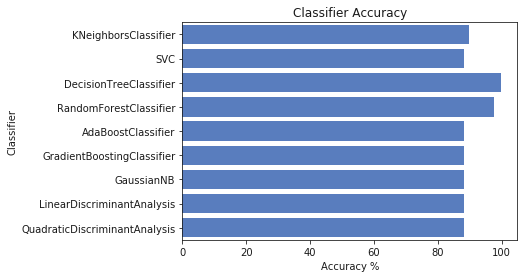

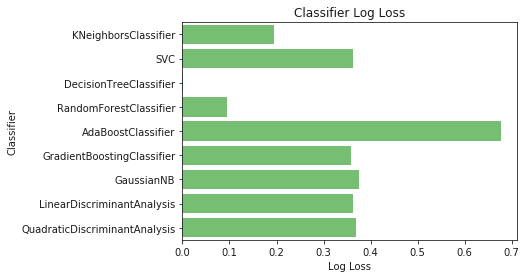

In [124]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

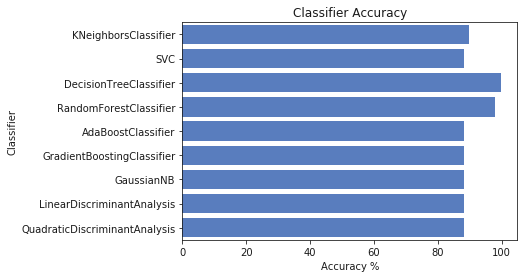

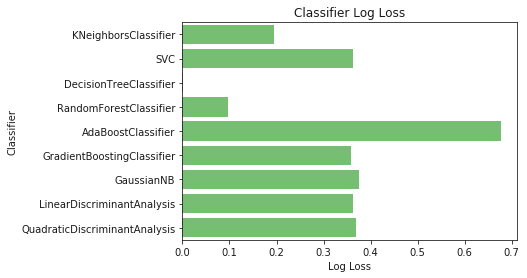

In [40]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()